In [1]:
import numpy as np
import pandas as pd
import time
import h5pyd
import geopandas as gpd
from dw_tap.data_fetching import getData
from dw_tap.power_output import estimate_power_output
from dw_tap.lom import run_lom

z_turbine = 30 # turbine height in [m]
lat, lon = 39.32856, -89.40238
obstacle_file = "../sites/180-5BuildingsManual.geojson"
#obstacle_file = "../sites/180-Manual1.geojson"

t_start = time.time()

#Read in data from CSV file instead of hsds + getData
atmospheric_df = pd.read_csv("../data/180_1year_12hourgranularity.csv")

# Temporary (later need to resave csv without index column) 
if "Unnamed: 0" in atmospheric_df.columns:
    atmospheric_df.drop(columns=["Unnamed: 0"], inplace=True)

obstacles_df = gpd.read_file(obstacle_file)
# Leave in only relevant columns
obstacles_df = obstacles_df[["height", "geometry"]]

xy_turbine = [np.array([lon, lat])]

t_lom_start = time.time()
predictions_df = \
    run_lom(atmospheric_df, obstacles_df, xy_turbine, z_turbine,
            check_distance=True)
t_lom = time.time() - t_lom_start
print('Running LOM: %.2f (s)' % t_lom)

t_power_start = time.time()
kw, above_curve, below_curve, above_curve_list, below_curve_list = \
    estimate_power_output(predictions_df, atmospheric_df["temp"], atmospheric_df["pres"])  
t_power = time.time() - t_power_start
print('Power estimation: %.2f (s)' % t_power)

t_total = time.time()-t_start
print('Total time: %.2f (s)' % t_total)

2023-02-09 11:11:26.874024: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-09 11:12:22.803209: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Done with loading ML model.
Running LOM: 1.11 (s)
Power estimation: 0.01 (s)
Total time: 11.84 (s)


In [2]:
atmospheric_df

,datetime,ws,wd,temp,pres
0,2007-01-01 00:00:00,7.744876,232.969856,282.541870,98493.965337
1,2007-01-01 12:00:00,9.165510,278.610485,272.009949,99037.753033
2,2007-01-02 00:00:00,5.667914,294.372393,275.522644,100177.180992
3,2007-01-02 12:00:00,1.196242,199.775672,272.208313,100652.980804
4,2007-01-03 00:00:00,6.783602,194.172807,276.606049,100410.263947
...,...,...,...,...,...
726,2007-12-30 00:00:00,3.874950,176.357785,272.583710,99716.562444
727,2007-12-30 12:00:00,4.888072,152.960520,271.582703,99367.990863
728,2007-12-31 00:00:00,6.975717,191.885982,275.272369,98836.610143
729,2007-12-31 12:00:00,4.802318,227.441046,270.859406,98993.799386


In [3]:
xy_turbine

[array([-89.40238,  39.32856])]

In [4]:
obstacles_df

,height,geometry
0,10,"POLYGON ((-89.40211 39.32865, -89.40212 39.328..."
1,10,"POLYGON ((-89.40247 39.32839, -89.40248 39.328..."
2,10,"POLYGON ((-89.40248 39.32817, -89.40248 39.327..."
3,10,"POLYGON ((-89.40224 39.32814, -89.40225 39.327..."
4,10,"POLYGON ((-89.40175 39.32828, -89.40176 39.328..."


In [5]:
predictions_df

,timestamp,ws,ws-adjusted
0,2007-01-01 00:00:00,7.744876,7.569669
1,2007-01-01 12:00:00,9.165510,8.897763
2,2007-01-02 00:00:00,5.667914,5.569570
3,2007-01-02 12:00:00,1.196242,1.194513
4,2007-01-03 00:00:00,6.783602,6.746246
...,...,...,...
726,2007-12-30 00:00:00,3.874950,3.829456
727,2007-12-30 12:00:00,4.888072,4.840860
728,2007-12-31 00:00:00,6.975717,6.940899
729,2007-12-31 12:00:00,4.802318,4.738298


In [6]:
predictions_df["ws-adjusted"].isna().value_counts()

False    731
Name: ws-adjusted, dtype: int64

<AxesSubplot: >

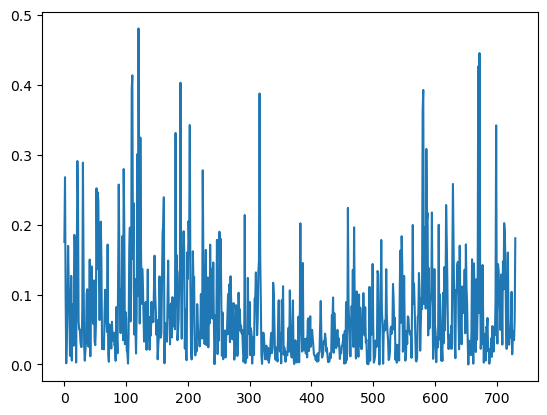

In [7]:
(predictions_df["ws"] - predictions_df["ws-adjusted"]).plot()

<AxesSubplot: >

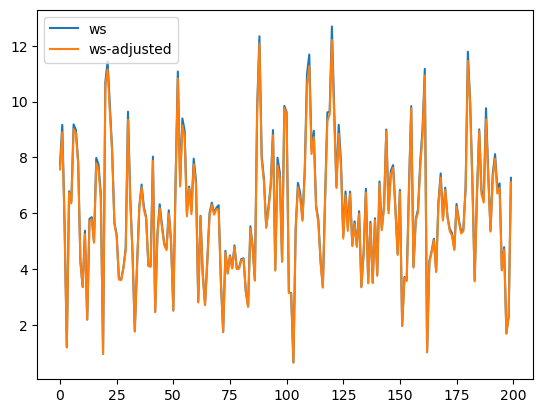

In [8]:
predictions_df[["ws", "ws-adjusted"]][:200].plot()

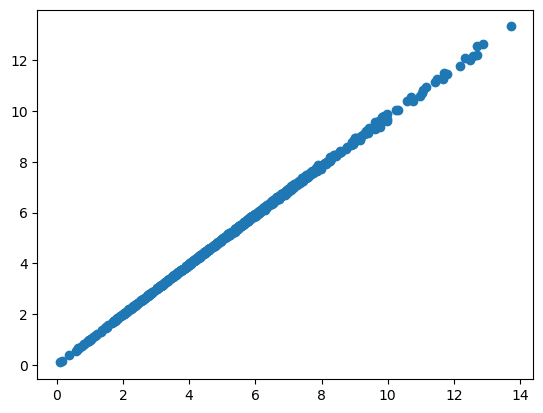

In [9]:
tmp = predictions_df # [predictions_df["nonlinear"] > 0]

import matplotlib.pyplot as plt
plt.scatter(tmp["ws"], tmp["ws-adjusted"])

In [10]:
tmp["ws"].max()

13.72442114431899

In [11]:
predictions_df["ws-adjusted"].max()

13.336969363007988

In [12]:
##### Cells below can be used for demonstration purposes

In [13]:
# atmospheric_df

In [14]:
# obstacles_df #height is in meters; geometry has polygons in (lat,lon) pairs

In [15]:
# xy_turbine # location of turbine in lat,lon

In [16]:
# z_turbine # hub height in meters 

In [17]:
# predictions_df = \
#     run_lom(atmospheric_df, obstacles_df, xy_turbine, z_turbine)

In [18]:
# predictions_df